In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set() 

In [2]:
mc=pd.read_csv("insurance.csv")

In [3]:
mc.sample(10)

,age,sex,bmi,children,smoker,region,charges
132,53,female,35.900,2,no,southwest,11163.56800
1028,54,male,31.600,0,no,southwest,9850.43200
876,49,female,27.100,1,no,southwest,26140.36030
1011,43,male,20.130,2,yes,southeast,18767.73770
1270,26,male,33.915,1,no,northwest,3292.52985
756,39,female,22.800,3,no,northeast,7985.81500
907,44,female,32.340,1,no,southeast,7633.72060
267,59,female,32.395,3,no,northeast,14590.63205
506,22,male,31.350,1,no,northwest,2643.26850
279,51,female,21.560,1,no,southeast,9855.13140


In [4]:
mc.shape

(1338, 7)

In [5]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
mc.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


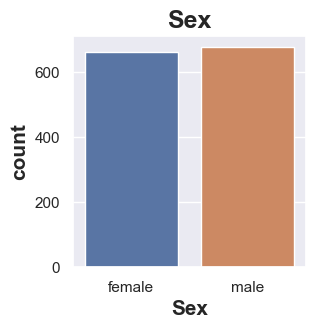

In [7]:
plt.figure(figsize=(3,3))
sns.countplot(x= mc['sex'])
plt.title("Sex", fontsize = 18, fontweight = "bold") 
plt.ylabel("count", fontsize = 15,fontweight = "bold" )
plt.xlabel("Sex", fontsize = 15,fontweight = "bold" )
plt.show()

In [8]:
mc["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

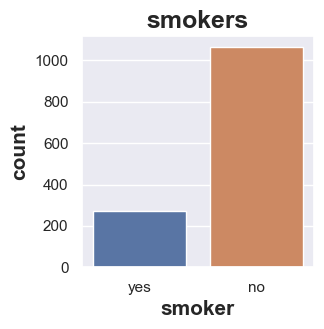

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(x= mc['smoker'])
plt.title("smokers", fontsize = 18, fontweight = "bold") 
plt.ylabel("count", fontsize = 15,fontweight = "bold" )
plt.xlabel("smoker", fontsize = 15,fontweight = "bold" )
plt.show()

In [10]:
mc["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

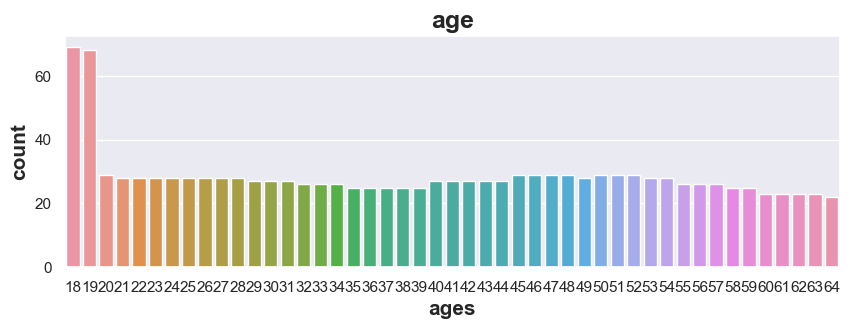

In [11]:
plt.figure(figsize=(10,3))
sns.countplot(x= mc['age'])
plt.title("age", fontsize = 18, fontweight = "bold") 
plt.ylabel("count", fontsize = 15,fontweight = "bold" )
plt.xlabel("ages", fontsize = 15,fontweight = "bold" )
plt.show()

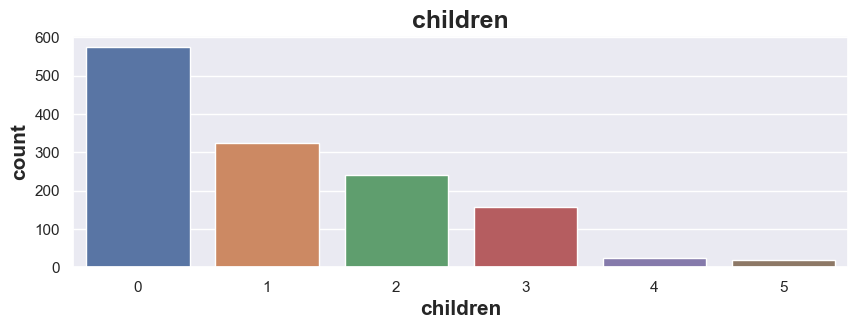

In [12]:
plt.figure(figsize=(10,3))
sns.countplot(x= mc['children'])
plt.title("children", fontsize = 18, fontweight = "bold") 
plt.ylabel("count", fontsize = 15,fontweight = "bold" )
plt.xlabel("children", fontsize = 15,fontweight = "bold" )
plt.show()

In [13]:
mc["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

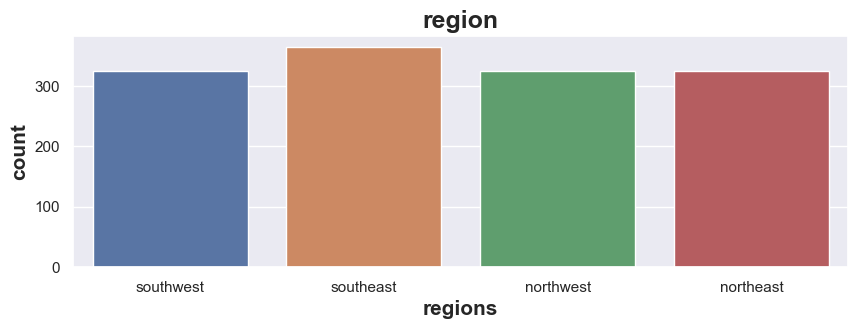

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(x= mc['region'])
plt.title("region", fontsize = 18, fontweight = "bold") 
plt.ylabel("count", fontsize = 15,fontweight = "bold" )
plt.xlabel("regions", fontsize = 15,fontweight = "bold" )
plt.show()

In [15]:
mc["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='children', ylabel='charges'>

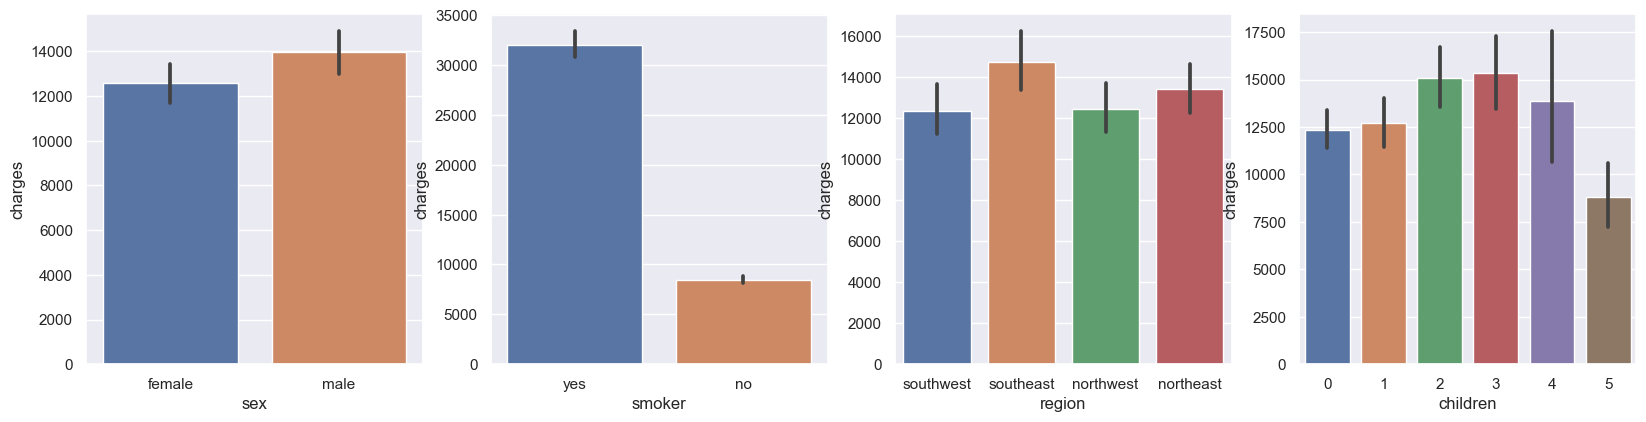

In [16]:
# Visualize average and distribution by categories
plt.figure(figsize=(20,10))

plt.subplot(241) 
sns.barplot(x='sex', y='charges', data=mc) 
 
plt.subplot(242) 
sns.barplot(x='smoker', y='charges', data=mc)

plt.subplot(243)
sns.barplot(x='region', y='charges', data=mc)

plt.subplot(244)
sns.barplot(x='children', y='charges', data=mc)

In [17]:
numeric_features = mc[['age', 'bmi', 'children']]
categorical_features = mc[['sex', 'smoker', 'region']]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False).fit(categorical_features)
encoded = ohe.transform(categorical_features)

ohe_features = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
ohe_features.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
x = pd.concat([numeric_features, ohe_features], axis=1)
y = mc[['charges']]
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
#accuracy of model while training
regressor.score(x_train,y_train)*100

74.17255854683333

In [29]:
#accuracy of model while testing
regressor.score(x_test,y_test)*100

78.35929767120723

In [30]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_test)
#difference between predicted valuses and true values
mean_squared_error(y_pred,y_test)

33596915.85136147

In [31]:
from sklearn.metrics import r2_score
print(round(r2_score(y_test,y_pred)*100,2), '%')

78.36 %


In [32]:
print(y_train.shape)
print(x_train.shape)

(1070, 1)
(1070, 11)


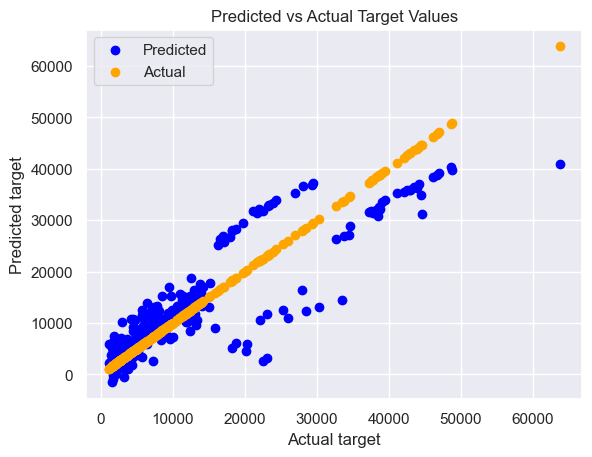

In [33]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Predicted vs Actual Target Values")
plt.legend()
plt.show()

# Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [35]:
y_pred = tree.predict(x_test)

In [37]:
#accuracy of model while training
tree.score(x_train,y_train)*100

99.83078124756305

In [39]:
#accuracy of model while testing
tree.score(x_test,y_test)*100

70.9245519167362

In [40]:
from sklearn.metrics import mean_squared_error
#difference between predicted valuses and true values
mean_squared_error(y_pred,y_test)

45139264.32481621

In [41]:
from sklearn.metrics import r2_score
print(round(r2_score(y_test,y_pred)*100,2),"%")

70.92 %


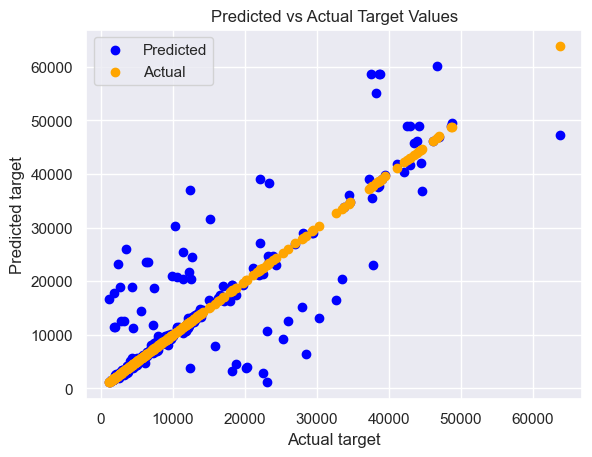

In [42]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Predicted vs Actual Target Values")
plt.legend()
plt.show()

# Random Forest regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) # adjust n_estimators default 10

# fit model to training data
rf.fit(x_train, y_train)

C:\Users\Asmaa Omar\AppData\Local\Temp\ipykernel_14488\869062615.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor()

In [44]:
y_pred = rf.predict(x_test)

In [45]:
#accuracy of model while training
rf.score(x_train,y_train)*100

97.6340264115173

In [46]:
#accuracy of model while testing
rf.score(x_test,y_test)*100

85.99236590052668

In [48]:
from sklearn.metrics import mean_squared_error
#difference between predicted valuses and true values
mean_squared_error(y_pred,y_test)

21746674.25144143

In [49]:
from sklearn.metrics import r2_score
print( round(r2_score(y_test,y_pred)*100,2) ,"%")

85.99 %


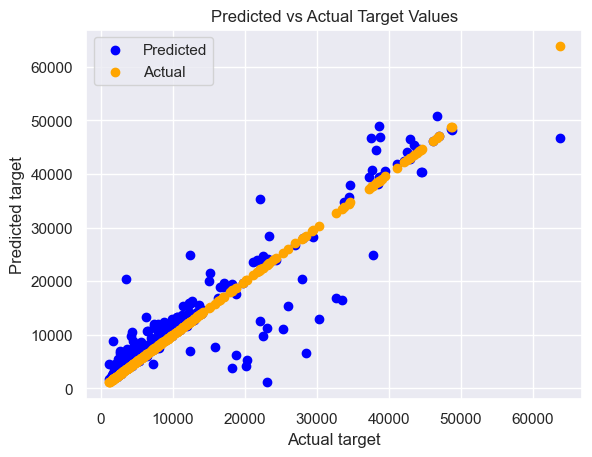

In [50]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Predicted vs Actual Target Values")
plt.legend()
plt.show()